In [15]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print(cities[0])
len(cities)


bluff


600

In [6]:
# create an empty list to hold the weather data
city_data = []

# print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters
record_count = 1
set_count = 1

# loop through all the cities in our list
for i, city in enumerate(cities[0:10]):    # DEBUG
    
    # group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_response = requests.get(city_url)
        if city_response.status_code != 200:
            print(f"City not found with {city_response.status_code} for url {city_url}")
            continue
                         
        city_weather = city_response.json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except Exception as err:
        print(f"unexpected error {type(err)} {err} found for url {city_url}")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | lata
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | taolanaro
City not found with 404 for url http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=133d84e687a803d03a38e0fa498576cc&q=taolanaro
Processing Record 7 of Set 1 | nanortalik
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | whitehorse
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
len(city_data)

9

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,51.08,93,94,8.12,NZ,2021-10-25 18:24:58
1,Lata,40.1629,-8.3327,59.81,78,25,3.22,PT,2021-10-25 18:24:59
2,Longyearbyen,78.2186,15.6401,21.04,63,40,18.41,SJ,2021-10-25 18:24:59
3,Ushuaia,-54.8000,-68.3000,33.46,86,75,24.16,AR,2021-10-25 18:25:00
4,Mataura,-46.1927,168.8643,50.47,97,98,2.66,NZ,2021-10-25 18:22:20
5,Nanortalik,60.1432,-45.2371,32.90,68,9,8.12,GL,2021-10-25 18:25:00
6,Punta Arenas,-53.1500,-70.9167,44.71,49,40,23.02,CL,2021-10-25 18:23:35
7,Rikitea,-23.1203,-134.9692,74.62,73,100,19.91,PF,2021-10-25 18:22:07
8,Whitehorse,60.7161,-135.0538,21.97,100,75,3.44,CA,2021-10-25 18:21:50


In [12]:
#reorder df columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2021-10-25 18:24:58,-46.6000,168.3333,51.08,93,94,8.12
1,Lata,PT,2021-10-25 18:24:59,40.1629,-8.3327,59.81,78,25,3.22
2,Longyearbyen,SJ,2021-10-25 18:24:59,78.2186,15.6401,21.04,63,40,18.41
3,Ushuaia,AR,2021-10-25 18:25:00,-54.8000,-68.3000,33.46,86,75,24.16
4,Mataura,NZ,2021-10-25 18:22:20,-46.1927,168.8643,50.47,97,98,2.66
5,Nanortalik,GL,2021-10-25 18:25:00,60.1432,-45.2371,32.90,68,9,8.12
6,Punta Arenas,CL,2021-10-25 18:23:35,-53.1500,-70.9167,44.71,49,40,23.02
7,Rikitea,PF,2021-10-25 18:22:07,-23.1203,-134.9692,74.62,73,100,19.91
8,Whitehorse,CA,2021-10-25 18:21:50,60.7161,-135.0538,21.97,100,75,3.44


In [13]:
# create output file (csv)
output_data_file = "weather_data/cities.csv"
# export the city data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# extract fields from the df for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

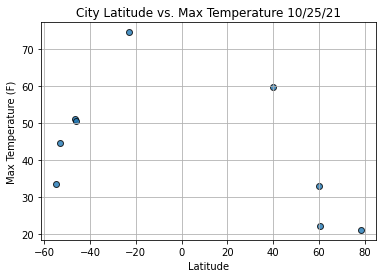

In [19]:
# build the scatter plot for latitidue vs max temp
plt.scatter(lats,
            max_temps,
           edgecolor="k", lw=1, marker="o",
           alpha=0.8, label="Cities")

# add other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig1.png")

# show plot
plt.show()

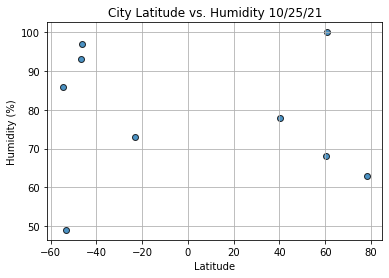

In [21]:
# build the scatter plot for latitude vs humidity
plt.scatter(lats,
            humidity,
           edgecolor="k", lw=1, marker="o",
           alpha=0.8, label="Cities")

# add other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig2.png")

# show plot
plt.show()

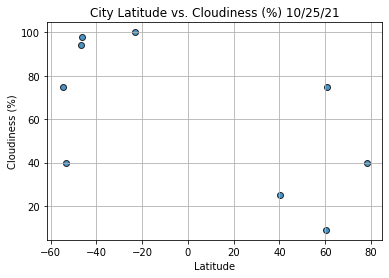

In [23]:
# build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="k", lw=1, marker="o",
           alpha=0.8, label="Cities")

# add other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig3.png")

# show plot
plt.show()

In [ ]:
# build the scatter plot for latitude vs wind speed
plt.scatter(lats,
            humidity,
           edgecolor="k", lw=1, marker="o",
           alpha=0.8, label="Cities")

# add other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig2.png")

# show plot
plt.show()